In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def hinton(matrix, max_weight=None, ax=None, missing_mask=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        if missing_mask is not None and missing_mask[x, y]:
            continue
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    
    ax.autoscale_view()
    ax.invert_yaxis()

In [68]:
# Parameters
N = 10 # samples vector
D = 8 # dimensional
p = 0.6 # correlation

mu = np.zeros(D)
std = np.linspace(0.3 , 0.5, D)
var = std ** 2
cov = np.outer(std, std) * p
np.fill_diagonal(cov, var)

# Set seed
np.random.seed(42)

Y_true = np.random.multivariate_normal(mu, cov, N).T # Shape (D,N)

missing_mask = np.random.rand(D,N) < 0.5
print(missing_mask)

Y_impute = np.empty_like(Y_true)

# Impute
for i in range(N):
    y = Y_true[:, i]
    mask = missing_mask[:, i]
    idx_m = np.where(mask)[0] # Missing indices
    idx_o = np.where(~mask)[0] # Observe indices

    mu_o = mu[idx_o]
    mu_m = mu[idx_m]

    cov_mo = cov[np.ix_(idx_m, idx_o)]
    cov_oo = cov[np.ix_(idx_o, idx_o)]

    mu_m_given_o = mu_m + cov_mo @ np.linalg.inv(cov_oo) @ (y[idx_o]-mu_o)
    y_cond = y.copy()
    y_cond[idx_m] = mu_m_given_o
    Y_impute[:, i] = y_cond


[[False  True  True False  True  True  True  True False False]
 [False False False  True False False False False  True  True]
 [ True  True False False  True False  True  True  True  True]
 [False  True False False  True False False  True  True  True]
 [ True  True False False  True  True False  True  True  True]
 [False  True False False  True False  True False False False]
 [ True False  True  True  True False False  True False  True]
 [False  True False  True False  True  True  True False False]]


## Plot

[[ 0.11300463 -0.01362674 -0.05127069  0.48058251 -0.01124952  0.04836023
   0.09844974 -0.04496239  0.14708089 -0.27631571]
 [ 0.16222168 -0.08144313  0.31025206 -0.01752259 -0.22580799 -0.26058801
   0.0039168   0.11121449 -0.16691204  0.2374967 ]
 [-0.19813204  0.64417926  0.26293902  0.28268558  0.39169532  0.01387055
  -0.3363694   0.4356805  -0.13508852  0.22294388]
 [-0.13856378 -0.03273259 -0.0146328   0.30463051 -0.32298506 -0.02986183
  -0.037096    0.42608691 -0.33417307  0.16749135]
 [-0.00891099  0.11062672  0.33898207  0.22096685 -0.33880418 -0.52196673
  -0.3649487   0.40209799 -0.03982401  0.39681533]
 [-0.60797094  0.35401207  0.86156887  0.29553943 -0.02055336 -0.28600711
  -0.26209399  0.06650024 -0.39228791  0.44354373]
 [-0.21355774  0.1946276   0.39496376 -0.06443584  0.07030446 -0.333698
  -0.3429294   0.29603097 -0.20634398 -0.32416303]
 [-0.21925566  0.04036154  0.37627586  0.08053783  0.36776106 -0.40121689
   0.32445584  0.42535083 -0.75303102 -0.58753396]]


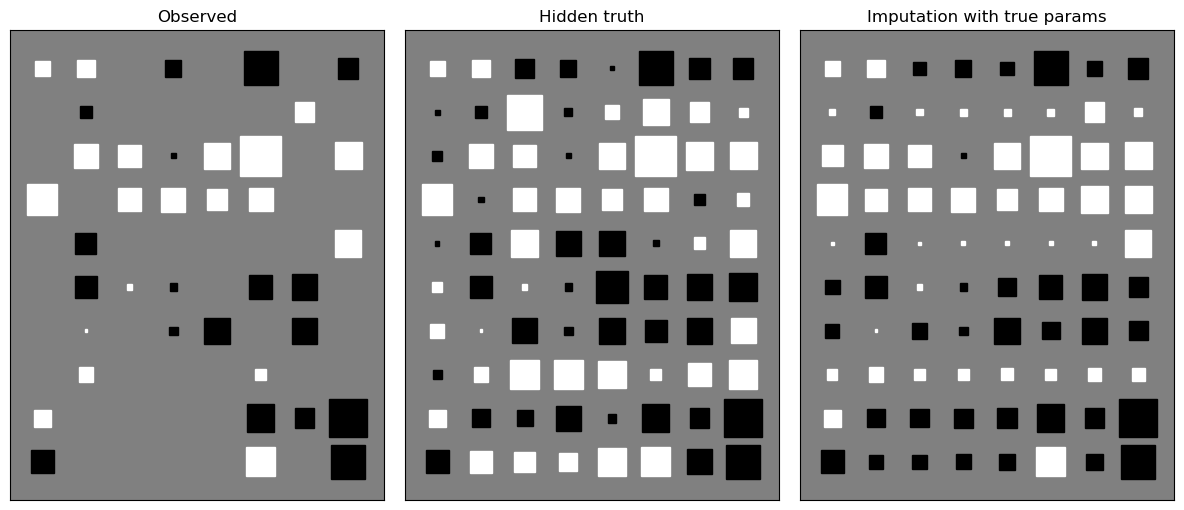

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

print(Y_true)

axes[0].set_title('Observed')
hinton(Y_true, missing_mask=missing_mask, ax=axes[0])

axes[1].set_title('Hidden truth')
hinton(Y_true, missing_mask=None, ax=axes[1])

axes[2].set_title('Imputation with true params')
hinton(Y_impute, missing_mask=None, ax=axes[2])

plt.tight_layout()
plt.show()